# Momentum strategies

In [67]:
import pandas as pd
import numpy as np
raw = pd.read_csv('data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()
data = pd.DataFrame(raw['XAU='])
data.rename(columns={'XAU=': 'price'}, inplace=True)
data.head()

,price
Date,
2010-01-04,1120.00
2010-01-05,1118.65
2010-01-06,1138.50
2010-01-07,1131.90
2010-01-08,1136.10


In [68]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

### Naive approach using the last return

<AxesSubplot:xlabel='Date'>

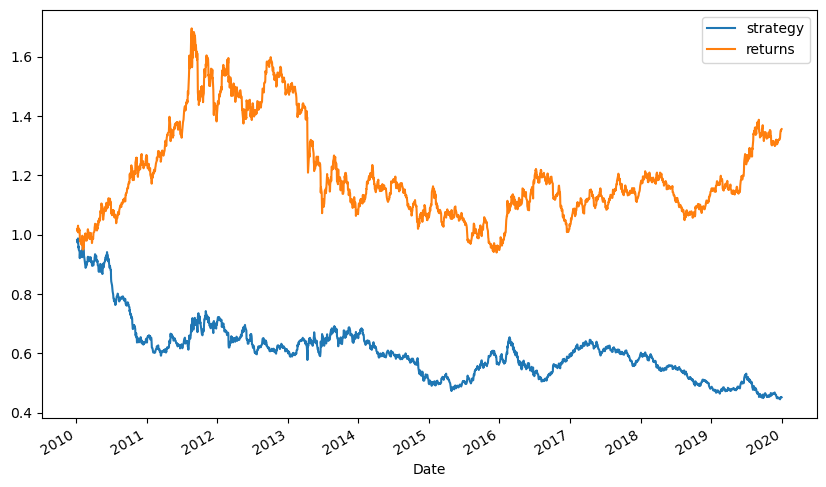

In [69]:
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']
data[['strategy', 'returns']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

### Momentum of the last three returns

In [70]:
data['position'] = np.sign(data['returns'].rolling(3).mean())
data.head()

,price,returns,position,strategy
Date,,,,
2010-01-04,1120.00,NaN,NaN,NaN
2010-01-05,1118.65,-0.001206,NaN,NaN
2010-01-06,1138.50,0.017589,NaN,-0.017589
2010-01-07,1131.90,-0.005814,1.0,-0.005814
2010-01-08,1136.10,0.003704,1.0,-0.003704


In [71]:
data['strategy'] = data['position'].shift(1) * data['returns']
data.head()

,price,returns,position,strategy
Date,,,,
2010-01-04,1120.00,NaN,NaN,NaN
2010-01-05,1118.65,-0.001206,NaN,NaN
2010-01-06,1138.50,0.017589,NaN,NaN
2010-01-07,1131.90,-0.005814,1.0,NaN
2010-01-08,1136.10,0.003704,1.0,0.003704


<AxesSubplot:xlabel='Date'>

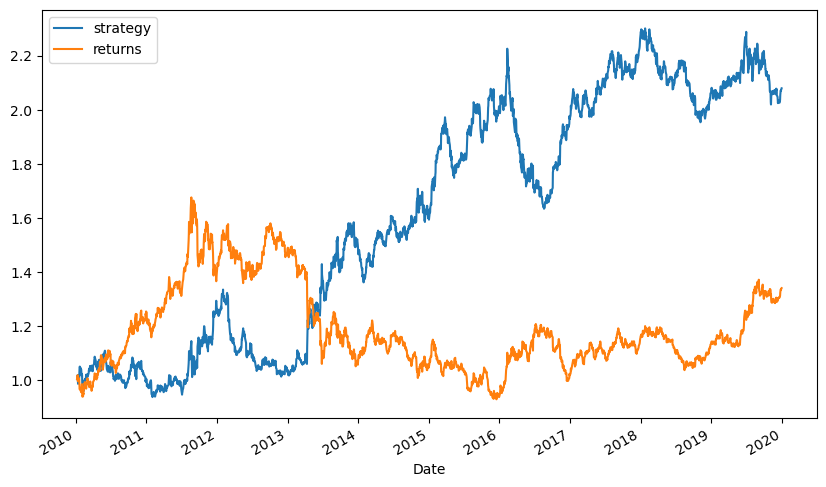

In [72]:
data[['strategy', 'returns']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

### Momentum of intraday performance

In [73]:
import os
import sys
dirpath = os.path.expanduser('~')
filepath = os.path.join(dirpath, 'source\\algo-trading-examples\\data\\AAPL_1min_05052020.csv')
data = pd.read_csv(filepath, index_col=0, parse_dates=True).dropna()  
data.head()

,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2020-05-05 16:00:00,299.02,298.8702,298.9000,298.8900,666.0,53490.0
2020-05-05 16:01:00,299.40,298.8900,298.8900,299.3700,1529.0,132301.0
2020-05-05 16:02:00,299.45,299.1601,299.3727,299.3850,1071.0,103622.0
2020-05-05 16:03:00,299.50,299.2105,299.3818,299.2300,1349.0,165947.0
2020-05-05 16:04:00,299.25,299.1500,299.2200,299.1673,694.0,71419.0


<AxesSubplot:title={'center':'AAPL intraday momentum'}, xlabel='Date'>

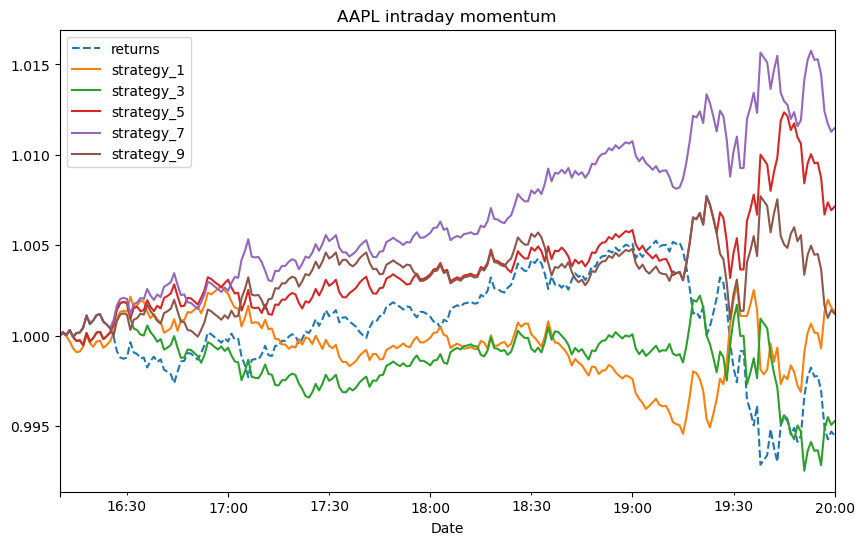

In [74]:
data['returns'] = np.log(data['CLOSE'] / data['CLOSE'].shift(1))
to_plot = ['returns']
for roll in [1, 3, 5, 7, 9]:
    data['position_%d' %roll] = np.sign(data['returns'].rolling(roll).mean())
    data['strategy_%d' %roll] = data['position_%d' %roll].shift(1) * data['returns']
    to_plot.append('strategy_%d' %roll)
data[to_plot].dropna().cumsum().apply(np.exp).plot(title = 'AAPL intraday momentum', 
                                                   figsize=(10, 6),
                                                  style=['--'])    